# A/B Testing - Comparing Bidding Methods

Problem: Facebook recently introduced a new bidding type, "average bidding", as an alternative to the existing "maximum bidding" bidding type. One of our customers, bombabomba.com, decided to test this new feature and would like to do an A/B test to see if average bidding converts more than maximum bidding. A/B testing has been going on for 1 month and now bombabomba.com is waiting for you to analyze the results of this A/B test from us. Purchase is the ultimate success criterion for Bombabomba.com. Therefore, the Purchase metric should be focused on for statistical tests.

In this data set, which includes the website information of a company, there is information such as the number of advertisements that users see and click on, as well as earnings information from this. There are two separate data sets, the control and test groups. These datasets are in separate sheets of the ab_testing.xlsx excel. Maximum Bidding was applied to the control group and Average Bidding was applied to the test group.

Variables:

Impression: Number of advertisement<br>
Click: Number of click on the displayed advertisement<br>
Purchase: Number of products purchased after the ads clicked<br>
Earning: Earnings after purchases

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
pearsonr, spearmanr, kendalltau, f_oneway, kruskal

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

___

## Task 1: Data Preparation and Analysis

**Step1: Read 'ab_testing.xlsx' file and assing the control and test group seperate dataframes.**

df_control = maximum bidding<br>
df_test = average bidding

In [3]:
df_control = pd.read_excel('ab_testing.xlsx', sheet_name='Control Group')

In [5]:
df_control.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


In [6]:
df_test = pd.read_excel('ab_testing.xlsx', sheet_name='Test Group')

In [7]:
df_test.head()

,Impression,Click,Purchase,Earning
0,120103.50380,3216.54796,702.16035,1939.61124
1,134775.94336,3635.08242,834.05429,2929.40582
2,107806.62079,3057.14356,422.93426,2526.24488
3,116445.27553,4650.47391,429.03353,2281.42857
4,145082.51684,5201.38772,749.86044,2781.69752


**Step 2: Compare and analyze the dataframes**

**Get Info**

In [39]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


**Check the unique values**

In [44]:
df_control.nunique()

Impression    40
Click         40
Purchase      40
Earning       40
dtype: int64

In [43]:
df_test.nunique()

Impression    40
Click         40
Purchase      40
Earning       40
dtype: int64

**Describe dataframes**

In [8]:
df_control.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00000,101711.44907,20302.15786,45475.94296,85726.69035,99790.70108,115212.81654,147539.33633
Click,40.00000,5100.65737,1329.98550,2189.75316,4124.30413,5001.22060,5923.80360,7959.12507
Purchase,40.00000,550.89406,134.10820,267.02894,470.09553,531.20631,637.95709,801.79502
Earning,40.00000,1908.56830,302.91778,1253.98952,1685.84720,1975.16052,2119.80278,2497.29522


In [9]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00000,120512.41176,18807.44871,79033.83492,112691.97077,119291.30077,132050.57893,158605.92048
Click,40.00000,3967.54976,923.09507,1836.62986,3376.81902,3931.35980,4660.49791,6019.69508
Purchase,40.00000,582.10610,161.15251,311.62952,444.62683,551.35573,699.86236,889.91046
Earning,40.00000,2514.89073,282.73085,1939.61124,2280.53743,2544.66611,2761.54540,3171.48971


In [10]:
df_control.isnull().sum()

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64

In [11]:
df_test.isnull().sum()

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64

**Check the distributions with histogram**

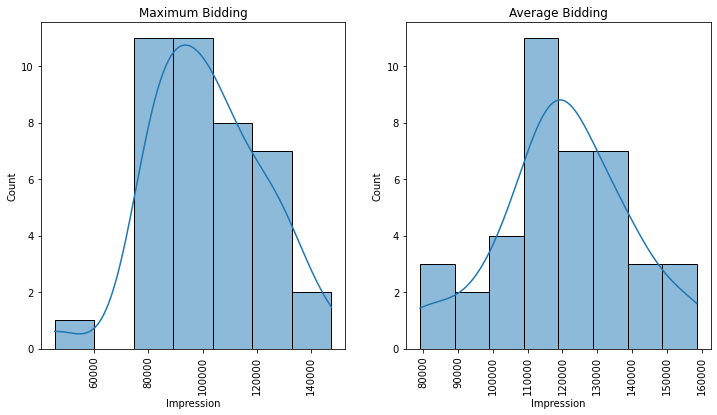

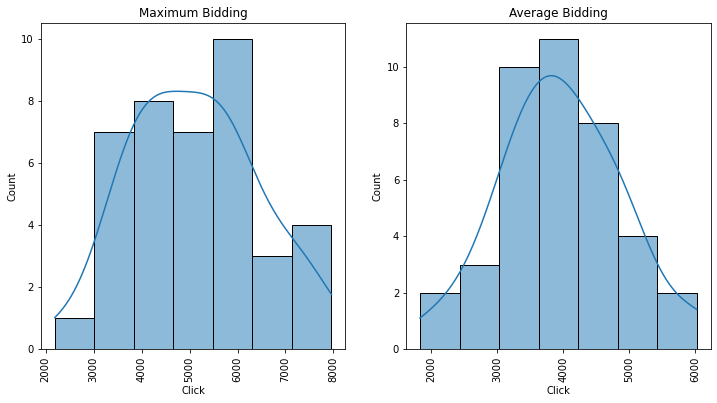

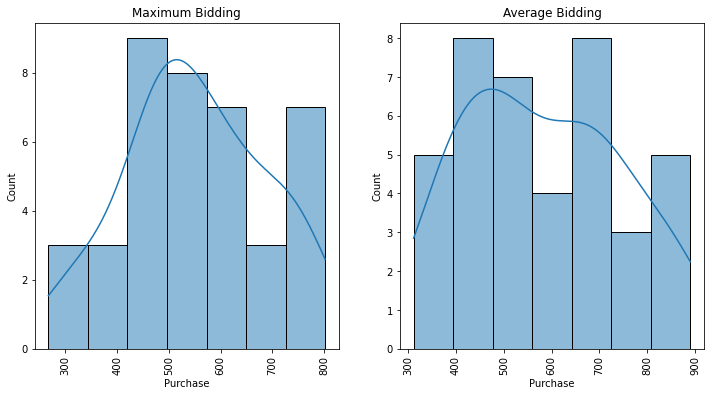

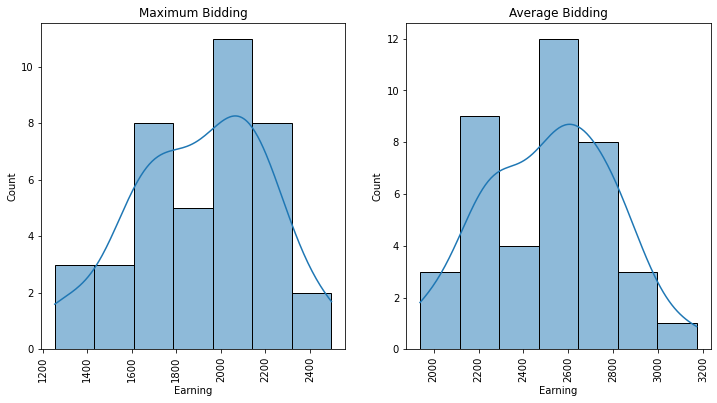

In [112]:
for col in df_test.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_control, x=col, kde=True)
    plt.title('Maximum Bidding')
    plt.xlabel(col)
    plt.xticks(rotation = 90)
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.histplot(data=df_test, x=col, kde=True)
    plt.title('Average Bidding')
    plt.xlabel(col)
    plt.xticks(rotation = 90)
    plt.ylabel('Count')

**Step 3: Concatenate the dataframes**

In [96]:
df = pd.concat([df_control, df_test], axis=1)

In [97]:
df.columns = [col.lower() + '_cont' if index <= 3 else col.lower() + '_test' for index, col in enumerate(df.columns)]

In [116]:
df.head()

,impression_cont,click_cont,purchase_cont,earning_cont,impression_test,click_test,purchase_test,earning_test
0,82529.45927,6090.07732,665.21125,2311.27714,120103.50380,3216.54796,702.16035,1939.61124
1,98050.45193,3382.86179,315.08489,1742.80686,134775.94336,3635.08242,834.05429,2929.40582
2,82696.02355,4167.96575,458.08374,1797.82745,107806.62079,3057.14356,422.93426,2526.24488
3,109914.40040,4910.88224,487.09077,1696.22918,116445.27553,4650.47391,429.03353,2281.42857
4,108457.76263,5987.65581,441.03405,1543.72018,145082.51684,5201.38772,749.86044,2781.69752


___

## Task 2: Define Hypothesis and Check Average Purchase

H0: Average purchase are equal for control and test groups.

H0 : M1 = M2 <br>
H1 : M1!= M2

In [102]:
df[['purchase_cont', 'purchase_test']].agg(['mean', 'median'])

,purchase_cont,purchase_test
mean,550.89406,582.10610
median,531.20631,551.35573


___

## Task 3: Apply Hypothesis Test

**Step 1: Assumption Checks**

Assumption 1:

H0: Distribution is normal. <br>
H1: Distrubution is not mormal.

In [105]:
test_stat, p_value = shapiro(df['purchase_cont'])
print('Test statistic: %.5f\np value: %.5f' % (test_stat, p_value))

Test statistic: 0.97727
p value: 0.58912


In [106]:
test_stat, p_value = shapiro(df['purchase_test'])
print('Test statistic: %.5f\np value: %.5f' % (test_stat, p_value))

Test statistic: 0.95895
p value: 0.15414


For each group, p values is greater than 0.05 so we accept the H0 hypothesis, which is distribution is normal.

Assumption 2:

H0: Variances are homogeneous.<br>
H1: Variances are not homogeneous.

In [108]:
test_stat, p_value = levene(df['purchase_cont'], df['purchase_test'])
print('Test statistic: %.5f\np value: %.5f' % (test_stat, p_value))

Test statistic: 2.63927
p value: 0.10829


P value is greater than 0.05 so we will accept the H0 that variances are homogeneous. 

Both assumption are correct so we will use parametric test for this case.

**Parametric Test**

In [110]:
test_stat, p_value = ttest_ind(df['purchase_cont'], df['purchase_test'], equal_var=True)
print('Test statistic: %.5f\np value: %.5f' % (test_stat, p_value))

Test statistic: -0.94156
p value: 0.34933


**Note: P value is greater than 0.05 so we will accept the H0 hypothesis that average purchase are equal for each groups. In conclusion, there is no statistically difference between the maximum and average bidding methods with %95 confidence interval.**